## Lab 1 Submission


#### Q1)

In [3]:
# Q1) Counting Measure

def counting_measure(set_elem: set):
    """ Counting elems in the set. """
    if type(set_elem) == set:
        # print(f"Set has {len(set_elem)} elements")
        return len(set_elem)
    raise Exception("Input is not of type set")


# Testing additivity on disjointed sets.

a = {'a', 'b', 'c'}
b = {'d','e','f'}
c = a.union(b)  # union of both a and b, 1,2,3,4,5,6,7,8
# print(type(c))
print(f"Set C has {counting_measure(c)} elements")
print(f"Set A has {counting_measure(a)} elements")

counting_measure(a)
counting_measure(b)
print(f"The total of both sets a: {counting_measure(a)} and set b: {counting_measure(b)} should add up to set c {counting_measure(c)}")

# Therefore the additivity on the disjoint sets adds up to the union,
# and thus the counting measure works.

print(type(a))

Set C has 6 elements
Set A has 3 elements
The total of both sets a: 3 and set b: 3 should add up to set c 6
<class 'set'>


#### Q2 Intervals

In [4]:
class Interval:
    def __init__(self, start:float, end:float):
        if type(start) not in [float, int] or type(end) not in [float, int]:
            raise Exception("Input type is not a float or int.")
        self.start = start
        self.end = end

    def get_start(self):
        """ Get start point of the interval"""
        return self.start

    def get_end(self):
        """ Get end point of the interval"""
        return self.end

    
    # implement length measure.
    def length_measure(self):
        """ Measure length of the interval """
        return self.end - self.start


i = Interval(1.4, 3.5)
length = i.length_measure()
print(f"Length of interval is: {length}")
    

Length of interval is: 2.1


#### Q3 Exponential Distribution

In [5]:
import math
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

In [6]:
def get_pm(interval:Interval):
    """ Get probability mass of the interval object for the exponential graph, with lambda defined as 2"""
    if type(interval) != Interval:
        raise Exception("Interval inputted is not of type Interval")

    # Obtain interval probability measure calc.
    start_point = interval.get_start()
    end_point = interval.get_end()
    intervals  = end_point-start_point
    if intervals == 0:
        return 0;  # The probability mass at one point is 0.
    
    # Generate exponential graph with lamda set to 2 with correct config.
    # according to doc, scale = 1 / lambda 
    lambda_val = 2
    scale = 1/ lambda_val

    expon_start = expon.cdf(start_point, scale=scale)
    expon_end = expon.cdf(end_point, scale=scale)
    # if len(expon_end - expon_start) <= 0:
    #     raise Exception("Range inputted cannot compute correct probability mass")

    probability_mass = expon_end - expon_start
    # We do not even need to compute the graph, or do any calculation.
    return probability_mass
    
# a)
a_interval = Interval(0, 1)
pm_a = get_pm(a_interval)
print(f"The probability mass for the range, 0 - 1, is {pm_a}")

# b)
b_interval = Interval(1,1)
pm_b = get_pm(b_interval)
print(f"The probability mass for the range, 1 - 1, is {pm_b}")

# c)
c_interval = Interval(1, 10)
pm_c = get_pm(c_interval)
print(f"The probability mass for the range, 1 - 10, is {pm_c}")

# d)
d_interval = Interval(0, float('inf'))  # math.inf  # should be 1, but coming as a nan.
pm_d = get_pm(d_interval)
print(f"The probability mass for the range, 0 - inf, is {pm_d}")


The probability mass for the range, 0 - 1, is 0.8646647167633873
The probability mass for the range, 1 - 1, is 0
The probability mass for the range, 1 - 10, is 0.13533528117545912
The probability mass for the range, 0 - inf, is 1.0


My answers seem to make sense visually, because, at the specific locations, that the range is asked for, it matches to the y coordinate, which is the CDF.


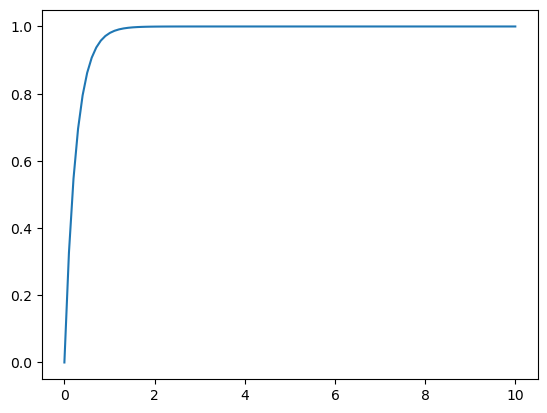

In [7]:
x = np.linspace(0,10,100)  # Range 0-3, steps 100
lambda_val = 2
expon_y = expon.cdf(x, scale=0.51/lambda_val)
#print(expon_y[-1])
#print(x[:10], y[:10])
plt.plot(x, expon_y, label="Expon Graph")

print("My answers seem to make sense visually, because, at the specific locations, that the range is asked for, it matches to the y coordinate, which is the CDF.")

------
#### Q4

In [8]:
from scipy.integrate import quad
from scipy.stats import expon  # import distribution.

def expon_pdf(x):
    """ PDF of expon, evaluated from x, using quad to compute following integrals"""
    # what does it mean evaluated at x?
    # print(*args)
    lambda_val = 2
    scale = 1/ lambda_val
    expon_y = expon.pdf(x, scale=scale)
    return expon_y


# Integral of functon mapped from expon_pdf(5)

def calc_integral_expon_pdf(x, lower, upper):
    expon_lamda = lambda x: expon_pdf(x)
    integral_val = quad(func=expon_lamda, a = lower, b = upper)
    return integral_val


# 4a)
a_int = calc_integral_expon_pdf(1, 0 , 1)
print(f"a integral: {a_int}")

# 4b)
b_int = calc_integral_expon_pdf(1, 1 , 1)
print(f"b integral: {b_int}")

# 4c) 
c_int = calc_integral_expon_pdf(1, 1 , 10)
print(f"c integral: {c_int}")

# 4d)
d_int = calc_integral_expon_pdf(1, 0, float('inf'))
print(f"d integral: {d_int}")

a integral: (0.8646647167633873, 9.599706771317021e-15)
b integral: (0.0, 0.0)
c integral: (0.13533528117545912, 2.4502060294750603e-09)
d integral: (0.9999999999999999, 1.5470064009984758e-10)


The answers obtain are the same as the previous question, because, we calculated the probability measure of the intervals in Q3) which is the CDF between the two points, 
as the probability measure is continuous.

The expon_pdf is an integral on the pdf, which is the cdf between the ranges given, so it makes sense to be the same as q4.


#### End of Submission 1  | 12/10/2023
------